# Projet d'étude Tests d'hypothèse
*Rédaction Rémi de Guiran. D'après une idée de Florian Dadouchi*

Pour les 3 journées de cours consacrées à cette partie, nous allons nous intéresser à la détection d'un signal sonore. Cela nous amènera en première itération à réaliser une étude sur le bruit de fond. Puis nous nous intéresserons à la détection d'un signal sonore présent au milieu du bruit de fond. Pour réaliser une détection, nous allons devoir faire une hypothèse qui nous permettra de décider si oui ou non, un signal sonore est détecté. 

Vous aborderez les notions suivantes :
* Fonctions de distribution en statistique (continues et discrètes)
* Elements de probabilités
* Tests d'hypothèses (choix d'une hypothèse nulle, d'une hypothèse alternative, critère de significativité et p-value)

Si cela remonte à loin, vous aurez besoin de vous raffraichir la mémoire sur certaines notions :
* Les bases du calcul différentiel et intégral (Qu'est ce qu'une dérivée ? Une intégrale ? etc). Vous n'aurez pas besoin de calculer des intégrales analytiquement mais il sera important de comprendre ces concepts pour avancer
* Les bases de probabilités.

**Sujet :** 
Depuis quelque temps, bien que vivant dans un endroit très calme la nuit, vous vous demandez si des sons ne vous dérangent pas pendant votre sommeil. Bien décidé à avoir le coeur net et plutôt que de vous demander à chaque reveil si celui-ci est dû à un son quelconque ou juste à une mauvaise qualité de sommeil, vous décidez de réaliser un enregistrement sonore la nuit, et de créer un test qui permettra de détecter les sons qui se seront produits durant cette nuit.

Tous les enregistrements sont disponibles avec le sujet, chacun en double :
* un au format ".wav" (ça serait dommage de ne pas utiliser vos oreilles alors que vous travaillez sur des signaux sonores)
* l'autre et en format .txt.

Chaque enregistrement est **échantillonné à 48 kHz**.

Pour éviter de perdre du temps, la variable "signal sonore" contenue dans chaque fichier .txt est déjà normalisée, pour avoir des amplitudes de signaux n'excédant pas quelques unités. Vous n'aurez donc pas besoin de modifier vos données pour travailler dessus.


**Information importante :**

Toutes les lois de probabilités porteront sur la valeur absolue de l’amplitude mesurée. De manière générale, par défaut toute référence à une amplitude renvoie à la valeur absolue de l’amplitude mesurée. Le cas contraire vous sera explicité. L’abréviation **va** renvoie à la valeur absolue, et **vr** à la valeur réelle.


**Resources :**


* Lois de probabilités :

Poly "Statistique Appliquée", chapitres 2.1 et 3.1

https://www.youtube.com/watch?v=YXLVjCKVP7U

https://statisticsbyjim.com/basics/probability-distributions/




* Tests d'hypothèses :

Poly "Statistique : Tests d'hypothèses", chapitre 1

https://www.youtube.com/watch?v=tTeMYuS87oU

https://towardsdatascience.com/everything-you-need-to-know-about-hypothesis-testing-part-i-4de9abebbc8a

# Iteration 1 - Etude du bruit et d'un son

# A Etude du bruit

Avant de commencer à réfléchir à un quelconque test de detection de son, vous décidez d'étudier le bruit de fond. Le bruit c'est en fait tout ce qui ne vous intéresse pas, une fluctuation très faiblement audible (écouter le fichier wav) et qui ne vous dérange pas pendant votre sommeil (vous vivez dans un endroit calme). Ce qui vous intéresse in fine, ce sont les sons (on distingue donc bien les notions de son et de bruit). Mais pour espérer les détecter des **sons**, il vous faut d'abord caractériser **le bruit**.

##  A.0 - Ecouter le fichier "bruit.wav" dans un lecteur audio

## A.1 - Importer le bruit "bruit_seul.txt" dans un array numpy

Vous pouvez utiliser la fonction loadtxt de numpy

In [56]:
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install scipy


import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm 
from scipy.stats import halfnorm



In [2]:
bruit_seul = np.loadtxt("Data/bruit_seul.txt")

In [3]:
bruit_seul = pd.DataFrame(bruit_seul)
bruit_seul = bruit_seul.rename(columns={0: 'Amplitude'})
bruit_seul

,Amplitude
0,0.492209
1,0.189033
2,1.509044
3,0.677286
4,-0.402110
...,...
999995,-0.500145
999996,-0.288808
999997,-0.142364
999998,0.443795


## A.2 - Plotter l'amplitude mesurée (en vr) en fonction du temps pour la première seconde d'enregistrement

On rappelle que la fréquence d'échantillonnage est 48 kHz

<Axes: >

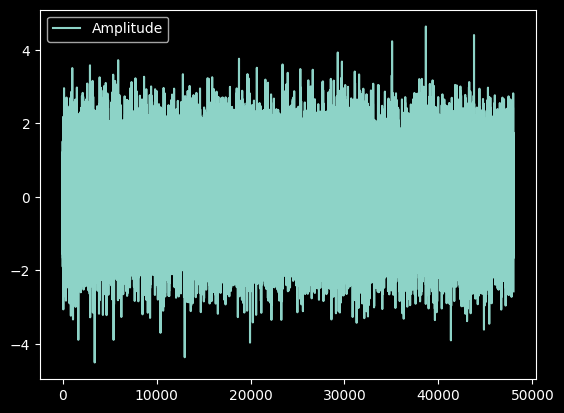

In [4]:
(
bruit_seul.iloc[:48000]
          .plot()

)

## A.3 - Afficher les probability density function (PDF) et  la cumulative distribution function (CDF) empiriques de l'amplitude du bruit en va

In [5]:
bruit_seul_abs = bruit_seul.abs()
bruit_seul_abs

,Amplitude
0,0.492209
1,0.189033
2,1.509044
3,0.677286
4,0.402110
...,...
999995,0.500145
999996,0.288808
999997,0.142364
999998,0.443795


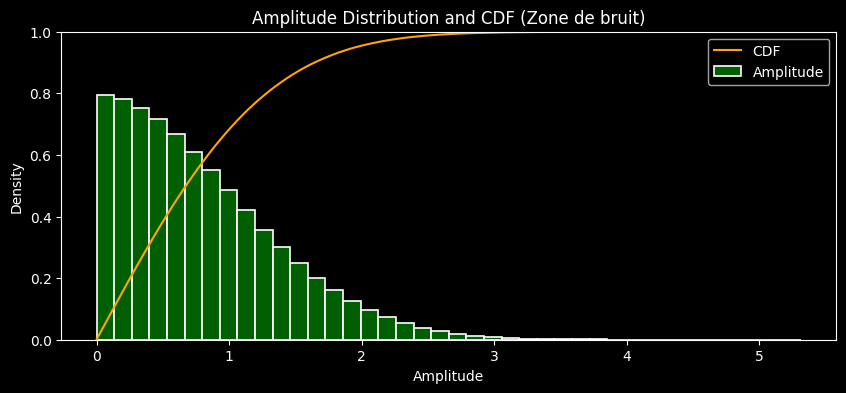

In [6]:
sns.histplot(bruit_seul_abs['Amplitude'],
             #kde=True,
             bins=int(40), 
             color = 'green', 
             edgecolor = 'white',
             linewidth=1.2,
             stat='density',
             label='Amplitude'
             )

sns.ecdfplot(data=bruit_seul_abs, x='Amplitude', color='orange', label='CDF')

plt.title('Amplitude Distribution and CDF (Zone de bruit)')
plt.gcf().set_size_inches(10, 4)
plt.legend()
plt.show()

## A.4 - Identifier les 2 lois de probabilités obtenues à la question précédente 

### a - Pouvez-vous identifier les 2 fonctions ?

Au vu de la forme des 2 fonctions, à quelles fonction analytiques ressemblent-elles ? Si vous avez une idée précise, identifiez la et donnez ses coefficients caractéristiques.
Sinon rendez-vous question suivante :)

### b - Calculez la moyenne et l'écart type du bruit (pas en valeur absolue cette fois)
Info : la classe `nd_array` du module `numpy` possède des méthodes qui font ça directement.

In [7]:
#mean
bruit_seul_mean = np.mean(bruit_seul)
bruit_seul_mean

0.0021000489434912562

In [8]:
#std deviation
bruit_seul_std = np.std(bruit_seul)
bruit_seul_std

/home/marcos.centurion@Digital-Grenoble.local/anaconda3/envs/stat3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Amplitude    0.999899
dtype: float64

### c - 1 - Sur le même graphe, affichez la PDF de $ \mid bruit \mid $ et la gaussienne de moyenne et d'écart type calculée question précédente

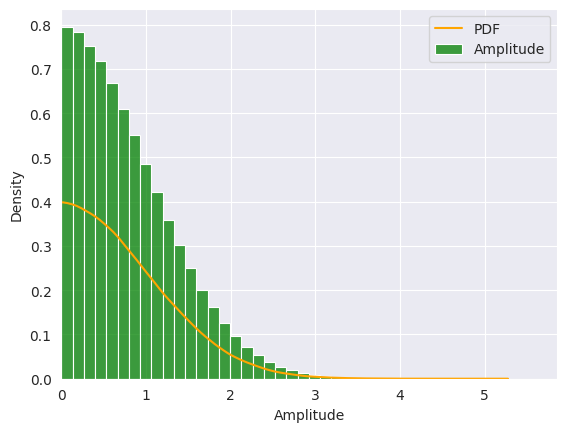

In [9]:
sns.set_style("darkgrid")

sns.histplot(bruit_seul_abs['Amplitude'],
             #kde=True,
             bins=int(40), 
             color = 'green', 
             edgecolor = 'white',
             linewidth=0.8,
             stat='density',
             label = 'Amplitude'
             )

sns.kdeplot(bruit_seul['Amplitude'], color='orange', linewidth=1.5, label='PDF')

plt.xlim(0)
plt.legend()
plt.show()

In [10]:
randon_values = np.random.normal(bruit_seul_mean, bruit_seul_std, 1000000)

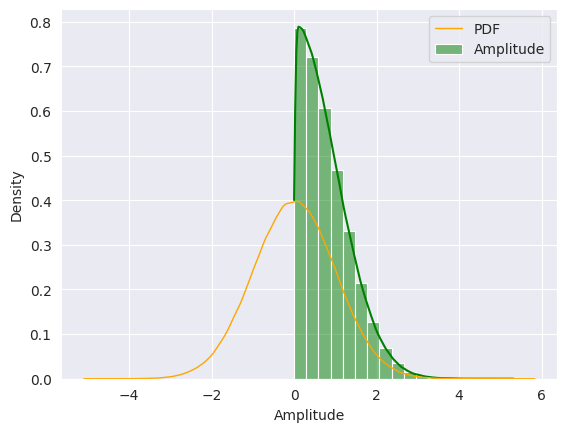

In [11]:
sns.histplot(bruit_seul_abs['Amplitude'],
             kde=True,
             bins=int(90/5), 
             color = 'green', 
             edgecolor = 'white',
             linewidth=0.8,
             stat='density',
             label = 'Amplitude'
             )

sns.kdeplot(randon_values, color='orange', linewidth=1, label='PDF')

plt.legend()
plt.show()

### c - 2 - Expliquez la différence entre les deux courbes.


In [12]:
#Half normal distribution

## A.5 - Evaluer la probabilité des amplitudes du bruit pour différentes plages d'amplitudes

Ici comme très souvent on différencie le bruit du son. Le bruit est une fluctuation statistique, alors que le son est porteur d'information.

On va considérer dans la suite de cette itération que le bruit est parfaitement caractérisé par une loi demi-normale, de moyenne $\mu =0$ et d'écart type $\sigma = 1 $. Sa fonction de densité (PDF) est :
$$ f(x) = \frac{2}{\sigma \sqrt{2 \pi}} \mathrm{e}^{- \frac{1}{2} \left( \frac{ (x - \mu)^2}{\sigma^2} \right)  }$$


On utilisera donc pour répondre aux questions suivantes (A.5) les CDF et PDF analytiques (c'est à dire théoriques) puisque l'on fait l'hypothèse que notre bruit est régi par une distribution demi-normale.

Vous pouvez explorer la doc de scipy.stats pour trouver les fonctions associées à diverses distributions : https://docs.scipy.org/doc/scipy/tutorial/stats.html

### a -  Donner la formule analytique de la fonction de répartition (CDF) de la loi demi-normale
(Pour les plus matheux elle peut se déduire de la PDF, sinon wikipedia est votre ami).

### b - 1 Probabilités sur les amplitudes du bruit

* Quelle est la probabilité d'observer des amplitudes comprises dans $[0 , \sigma]$  ?
* Même question pour $[0 , 2\sigma]$
* Même question pour $[0, 3\sigma]$


*** Bruit_Abs_Mean

In [13]:
bruit_abs_mean = np.mean(bruit_seul_abs)
bruit_abs_mean

0.7978866039964289

*** Bruit_Abs_Std

In [14]:
bruit_abs_std = np.std(bruit_seul_abs)
bruit_abs_std


/home/marcos.centurion@Digital-Grenoble.local/anaconda3/envs/stat3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Amplitude    0.602643
dtype: float64

In [15]:
sigma = 1

sigma1 = halfnorm.cdf(1*sigma)
print(sigma1)
sigma2 = halfnorm.cdf(2*sigma)
print(sigma2)
sigma3 = halfnorm.cdf(3*sigma)
print(sigma3)

0.6826894921370859
0.9544997361036416
0.9973002039367398


### b - 2 Probabilités sur les amplitudes du bruit

À l'inverse on s'intéresse maintenant aux amplitudes comprises dans l'intervalle  $[a,\infty]$ (avec $a > 0$).

Déterminer les valeur de a pour que la probabilité de d'observer une amplitude supérieure à $a$ (donc comprise dans $[a,\infty]$) soit de :

- 5 %
- 1%
- 0.1%


In [16]:
prob5 = halfnorm.ppf(1-0.05) #95%
print(prob5)
prob1 = halfnorm.ppf(1-0.01) #99%
print(prob1)
prob01 = halfnorm.ppf(1-0.001) #99.9%
print(prob01)


1.959963984540054
2.5758293035489004
3.2905267314919255


# B - Etude d'un son

Vous avez réalisé un enregistrement pendant la nuit. En inspectant rapidement la courbe amplitude(temps), il vous semble voir quelque chose de particulier, et vous soupçonnez fortement qu'il ne s'agisse pas du bruit mais d'un son (une tentative d'effraction ?). Vous trouverez l'extrait en question dans le fichier "son.wav".

## B.0 -  Ecoutez l'extrait

Bon c'est effectivement un son, mais rien d'alarmant. Mais il n'empêche que vous aimerez pouvoir détecter les sons sans avoir à regarder le signal tous les matins.

## B.1 -  Importez le fichier "son.txt" dans un array numpy et faites un plot comparant un zone exclusivement bruitée et une zone de son

In [17]:
son = np.loadtxt("Data/son.txt")

In [18]:
# Matplotlib
#plt.plot(son)

<Axes: >

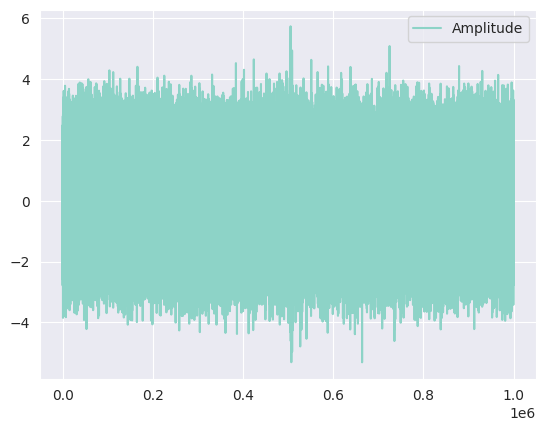

In [19]:
son_df = pd.DataFrame(son)
son_df = son_df.rename(columns={0: 'Amplitude'})
son_df.plot()

In [20]:
son_df_abs = (son_df.abs()
                    #.sort_values(by="Amplitude", ascending=False)
              
              )


In [21]:
son_df_abs

,Amplitude
0,0.276235
1,0.237085
2,1.098637
3,0.049679
4,0.109675
...,...
999995,0.066749
999996,1.040575
999997,0.747036
999998,0.400601


Zone de son

<Axes: >

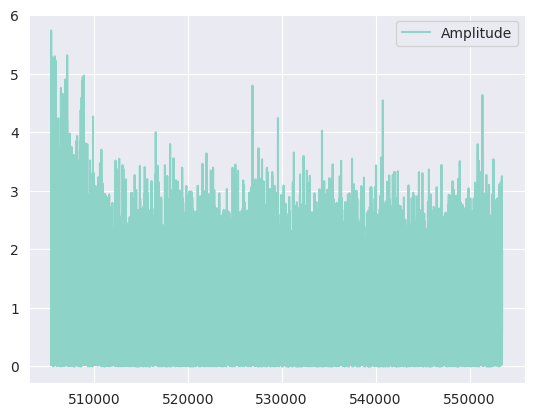

In [22]:
zone_son = son_df_abs.iloc[505462:553462]

zone_son.plot()

Zone de bruit

<Axes: >

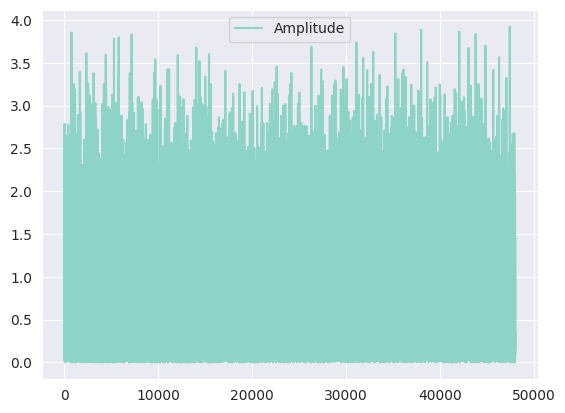

In [23]:
zone_bruit = son_df_abs.iloc[0:48000]
zone_bruit.plot()

Comparaison zones de bruit et de son

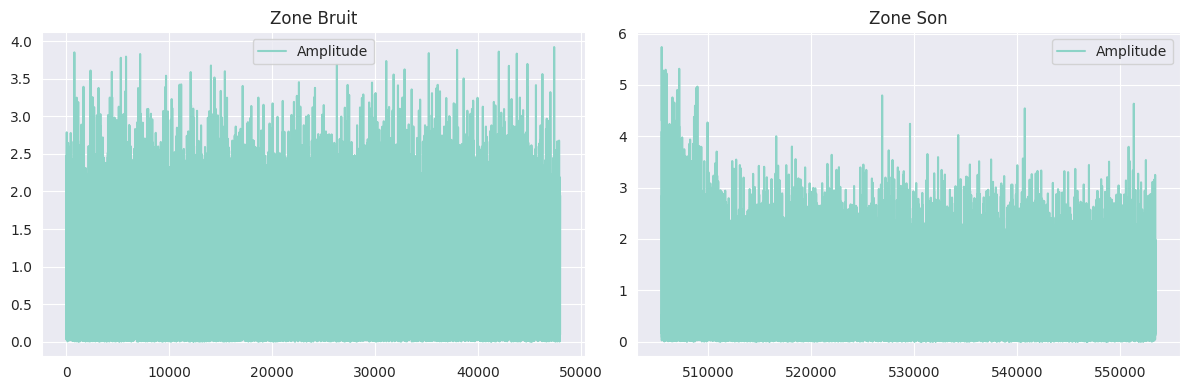

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(data=zone_bruit, ax=axes[0])
axes[0].set_title('Zone Bruit')
sns.lineplot(data=zone_son, ax=axes[1])
axes[1].set_title('Zone Son')

plt.tight_layout()
plt.show()


## B.2 -  Identifier approximativement la zone de son et afficher la PDF et la CDF empiriques de l'amplitude (en va), quelle différence avec celles du bruit ?

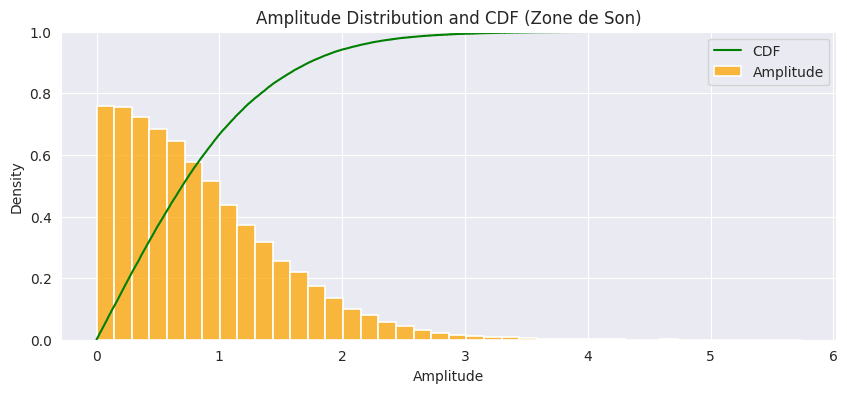

In [25]:
sns.histplot(zone_son['Amplitude'],
             #kde=True,
             bins=int(40), 
             color = 'orange', 
             edgecolor = 'white',
             linewidth=1.2,
             stat='density',
             label='Amplitude'
             )

sns.ecdfplot(data=zone_son, x='Amplitude', color='green', label='CDF')

plt.title('Amplitude Distribution and CDF (Zone de Son)')
plt.gcf().set_size_inches(10, 4)
plt.legend()
plt.show()

## B.3 - Afficher pour différents seuils d’amplitude (en va) les index où l’amplitude est supérieure à ce seuil (en plottant avec deux couleurs différentes par exemple). 

Conclure sur la possibilité d'identifier l'intervalle du son avec cette méthode.

<Axes: >

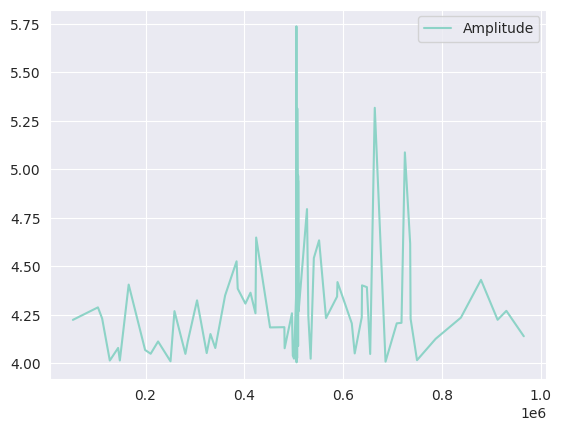

In [26]:
son_over4 = son_df_abs[son_df_abs.Amplitude > 4.00000 ]
son_over4.plot()


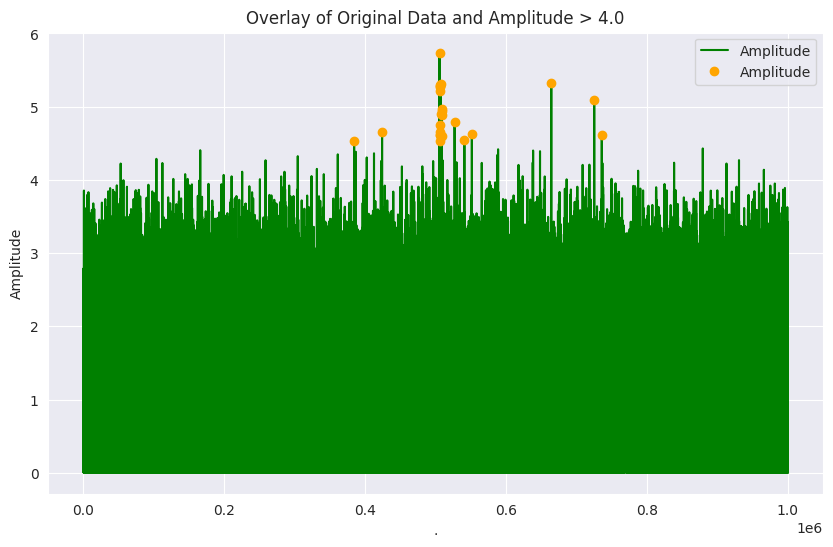

In [27]:
son_over4 = son_df_abs[son_df_abs['Amplitude'] > 4.5]

fig, ax = plt.subplots(figsize=(10, 6))

son_df_abs.plot(ax=ax, color='green', label='Original Data')

son_over4.plot(ax=ax, marker='o', linestyle='None', color='orange', label='Amplitude > 4.0')

ax.set_title('Overlay of Original Data and Amplitude > 4.0')
ax.set_xlabel('.')
ax.set_ylabel('Amplitude')

ax.legend()

plt.show()


# Itération 2 - Test d'hypothèse

Plutôt que de faire des tests sur les occurences ponctuelles d'amplitude supérieure à une valeur seuil, vous décidez de faire une étude similaire portant sur le nombre d'occurences durant un certain temps. De cette manière, si le bruit atteint ponctuellement une amplitude importante, on peut se douter qu'il a très peu de chance de réitérer cet "exploit" beaucoup de fois dans un intervalle de temps court. Tout l'enjeu sera de quantifier cette "chance" (ie cette probabilité).

# A - Un peu de proba


* On note une limite d'amplitude $a_l$. La probabilité d'obtenir sur une unique mesure (on peut dire tirage comme pour les jeux de hasard) une amplitude $a$, telle que $a \geq a_l $ est notée $p$.
* On note $n$, le nombre d'amplitudes mesurées sur un intervalle (échantillon).
* On note $k$ un entier positif inférieur ou égal à $n$. 



## A.1 - Donnez la formule de $P_k^{n}$, la probabilité de  tirer $k$ fois une amplitude supérieure ou égale à $a_l$ lors de $n$ tirages.

Les plus affamés d'entre vous peuvent la démontrer. Sinon une recherche sur internet suffira largement.


$ P(X = k) = \binom{n}{k} \times p^k \times (1-p)^{n-k} $



## A.2 - Trouvez dans un package python existant une fonction  qui permet de calculer cette probabilité $P_k^n$




In [28]:
from scipy.stats import binom

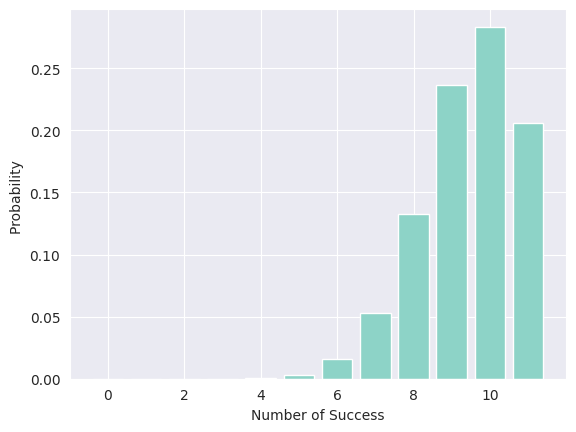

In [29]:
#Example

n = 12
p = 0.8
x = range(0, n)
pmf_result = binom.pmf(x, n, p)

dist = [binom.pmf(r, n, p) for r in x]
plt.bar(x, dist)
plt.xlabel("Number of Success")
plt.ylabel("Probability ")
plt.show()


##### Expérience avec une probabilité de réussite de 80% est prise en compte et l’expérience est effectuée 12 fois. 
      Étant donné que notre probabilité de réussite à chaque essai est assez élevée, le résultat peut être visualisé comme suit :
      La chance d’obtenir le succès une seule fois sera très inférieure à 4.09600000e-09.
      La chance d’obtenir près de 8 fois le succès est assez élevée, comme le montre le graphique à barres.

###### https://www.delftstack.com/fr/api/scipy/scipy-scipy.stats.binom-method/

## A.3 - Soit $n =20 $ :

### a - Pour plusieurs valeurs de $p$, calculez $P_k^{n}$ pour chaque $k=1..n$

Vérifiez bien que la somme des probabilités sur toutes les valeurs de $k$ pour chaque loi vaut 1

In [30]:
n = 20
p = 0.5
x = range(0, n)
pmf_result = binom.pmf(x, n, p)

print("x:\n", list(x))
print("The pmf of x is:\n", pmf_result)

x:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
The pmf of x is:
 [9.53674316e-07 1.90734863e-05 1.81198120e-04 1.08718872e-03
 4.62055206e-03 1.47857666e-02 3.69644165e-02 7.39288330e-02
 1.20134354e-01 1.60179138e-01 1.76197052e-01 1.60179138e-01
 1.20134354e-01 7.39288330e-02 3.69644165e-02 1.47857666e-02
 4.62055206e-03 1.08718872e-03 1.81198120e-04 1.90734863e-05]


###  b - Affichez en une sur un plot en barre

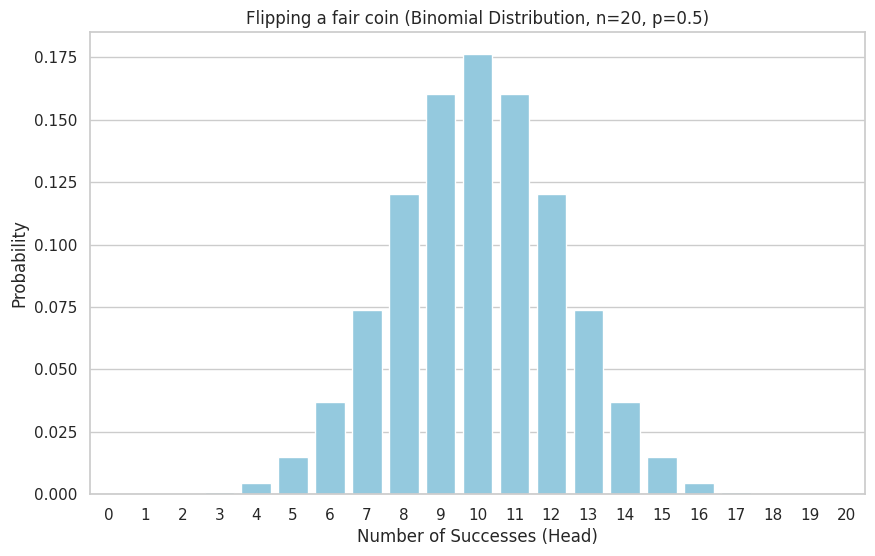

In [31]:
n = 20
p = 0.5
x = range(0, n+1) 

pmf = binom.pmf(x, n, p)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=list(x), y=pmf, color='skyblue')
plt.title(f'Flipping a fair coin (Binomial Distribution, n={n}, p={p})')
plt.xlabel('Number of Successes (Head)')
plt.ylabel('Probability')
plt.show()


### c - Affichez les toutes sur le même graphe
Conseil : pour la visibilité utilisez plutôt plot que bar

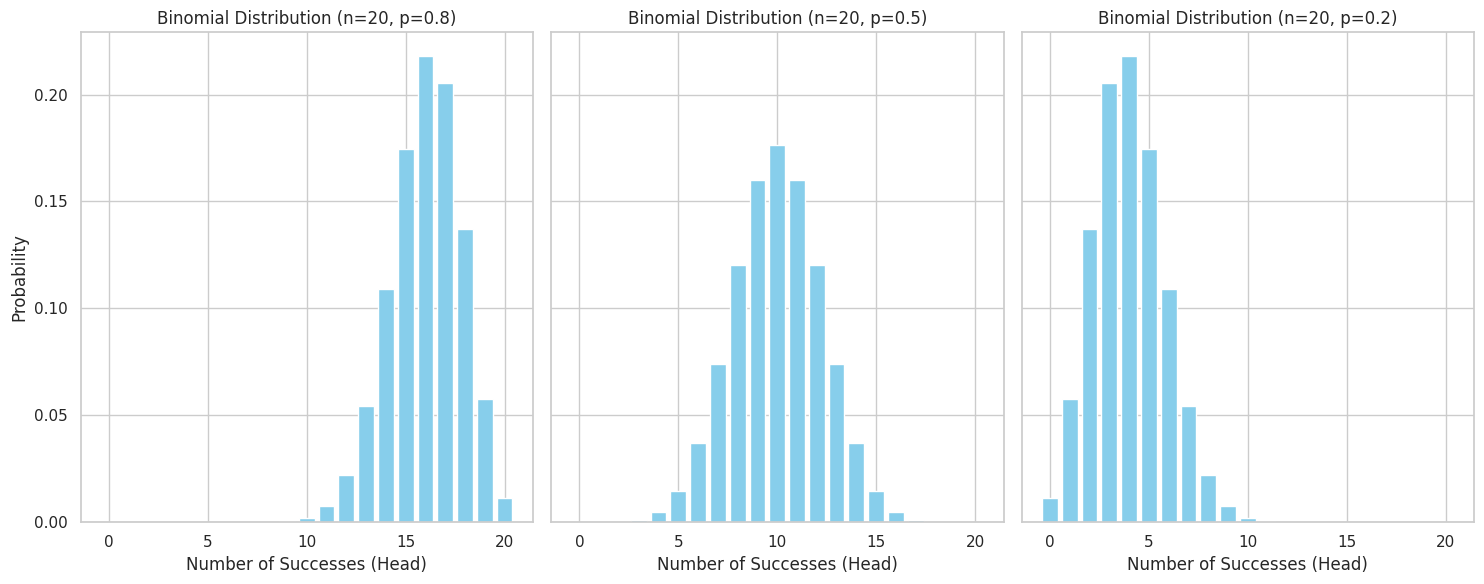

In [32]:
# Parameters
n = 20
p_values = [0.8, 0.5, 0.2]
x = range(0, n+1)

# Plotting side by side without using for loop
fig, axes = plt.subplots(1, len(p_values), figsize=(15, 6), sharey=True)

# Plot each distribution
[axes[i].bar(x, binom.pmf(x, n, p), color='skyblue') for i, p in enumerate(p_values)]

# Set titles and labels
[axes[i].set_title(f'Binomial Distribution (n={n}, p={p})') for i, p in enumerate(p_values)]
[axes[i].set_xlabel('Number of Successes (Head)') for i in range(len(p_values))]
axes[0].set_ylabel('Probability')

plt.tight_layout()
plt.show()


Question subsidiaire : quel objet mathématique permet d'unifier le concept de loi de probabilité discrète et celui de densité de probabilité qui s'applique aux variables aléatoire continues (pdf) ?

In [33]:
# ?

# B - Construction du test d'hypothèse

Vous voulez donc construire votre test d'hypothèse. On s'appuiera pour ce test sur la loi binomiale étudiée partie A. Pour cela, vous avez besoin de définir une hypothèse nulle, une hypothèse alternative, ainsi qu'un critère de significativité.

* Il faudra identifier l'amplitude $a_l$ correspondant à une probabilité $p$. Cette probabilité correspond à la probabilité, sur une seule mesure du bruit, d'obtenir une amplitude supérieure ou égale à $a_l$. Donc vous devrez décider d'abord de la valeur de $p$ pour en déduire $a_l$ (si vous êtes confus, revoyez la partie 4-b de l'itération 1).
* Vous aurez besoin de choisir un $n$. Vous comptabiliserez pour un intervalle comprenant $n$ mesures, le nombre $N_a$ de fois que vous aurez obtenu une mesure $a \geq a_l$.

Mais d'abord :

## B.1 - Questions théoriques (sans code)



### a - Caractérisez l'hypothèse nulle de votre test $H_{0} $


In [34]:
# H0 = Zone de bruit.




### b - Caractérisez l'hypothèse alternative $H_1$ (ou $H_a$ selon les gouts)



In [35]:
# H1 = Zone de son

### c - Identifier l'élément mesurable (i.e. la statistique) qui permettra de réaliser le test


In [36]:
# Le signal sonore (Son)

### d - Rappeler la loi de probabilité de cet élément mesurable (ie cette statistique "sous" $H_0$)

### e -  Définir la p-value d'un test (donner la formule), et la valeur qu'elle prend pour ce test en particulier



### f - Étant donné le seuil de significativité $\alpha$, identifier dans quelles situations $H_0$ sera rejetée, ou bien  non rejetée.

## B.2 Réaliser un test d'hypothèse :

Comme énoncé au début de cette partie B, il faut choisir une valeur pour $p$ et pour $n$. On se fixera $n = 100$, et $p = 0.01$. On se donnera également $\alpha = 0.05 $.

On commencera d'abord par travailler sur un intervalle de 100 mesures au milieu du signal sonore, entre les indices : $[505400, 505500]$.


### B.2.a - Plotter la PMF loi de probabilité de l'élément mesurable "sous" $H_0$

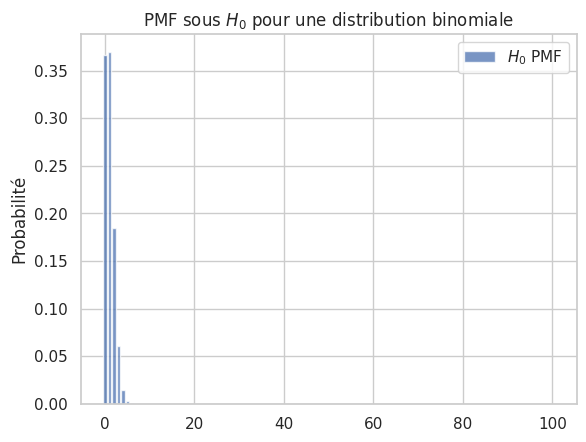

In [192]:
#Plot 
n = 100
p = 0.01
alpha = 0.05

x = np.arange(0, n+1)

pmf_h0 = binom.pmf(x, n, p)

plt.bar(x, pmf_h0, label=r'$H_0$ PMF', alpha=0.75)

plt.title('PMF sous $H_0$ pour une distribution binomiale')
#plt.xlabel('Nombre de succès')
plt.ylabel('Probabilité')
plt.legend()
plt.show()


### B.2.b - Calculer la valeur de l'élément mesurable d'après $p$

In [84]:
p=0.01

al = halfnorm.ppf(1 - p)

In [80]:
al

2.5758293035489004

In [83]:
np.mean(son_df)  #  np.std(son_df)

0.000903158303491256

In [122]:
son_abs = son_df_abs.values
son_abs

array([[0.2762355 ],
       [0.23708508],
       [1.09863731],
       ...,
       [0.74703573],
       [0.40060063],
       [0.0141977 ]])

In [123]:
listes_amplitudes_plage = []
for i in range(505400,505501):
    if (son_abs[i] >= al):
        listes_amplitudes_plage.append(son_abs[i])
print(listes_amplitudes_plage)
Na = len (listes_amplitudes_plage)
Na

[array([3.02769544]), array([2.80517216]), array([4.20110101]), array([3.22557038]), array([4.13160304]), array([4.32543403]), array([4.30711508]), array([5.73603696]), array([4.0923977]), array([2.85301814]), array([2.84991049])]


11

### B.2.c - Calculez la p-value de votre test. A quoi correspond-elle ?


In [103]:
result_test = scipy.stats.binomtest(11, 100, p = 0.01)
result_test

BinomTestResult(k=11, n=100, alternative='two-sided', statistic=0.11, pvalue=6.2555183828340835e-09)

In [146]:
p_value = result_test.pvalue
p_value

6.2555183828340835e-09

In [95]:
# #norm = norm.cdf(premier_intervale)
# norm_sorted = np.sort(norm)
# norm_sorted

### B.2.d -  Prendre la décision (rejet ou non) concernant l'hypothèse posée


### B.2.e - Le test que vous venez de construire s'appelle en réalité un test binomial. Trouvez une librairie qui l'implémente et comparez avec votre p-value.


In [98]:
scipy.stats.binomtest(11, 100, p = 0.01).pvalue >= 0.05

False

### B.2.f - Réaliser ce même test pour tout l'enregistrement pour chaque intervalle de 100 mesures et retracer le signal avec une couleur différente pour les intervalles pour lesquels l'hypothèse $H_0$ a été rejetée. Ré-essayer avec $\alpha = 0.000001$.


In [160]:
# Diviser le tableau en intervalles de 100
intervalles = []
taille_intervalle = 100
nombre_intervalles = len(son_abs) // taille_intervalle
mes_index=[]

for i in range(nombre_intervalles):
    debut = i * taille_intervalle
    fin = (i + 1) * taille_intervalle
    intervalle = son_abs[debut:fin]
    intervalles.append(intervalle)
    mes_index.append((debut,fin))
mes_index

[(0, 100),
 (100, 200),
 (200, 300),
 (300, 400),
 (400, 500),
 (500, 600),
 (600, 700),
 (700, 800),
 (800, 900),
 (900, 1000),
 (1000, 1100),
 (1100, 1200),
 (1200, 1300),
 (1300, 1400),
 (1400, 1500),
 (1500, 1600),
 (1600, 1700),
 (1700, 1800),
 (1800, 1900),
 (1900, 2000),
 (2000, 2100),
 (2100, 2200),
 (2200, 2300),
 (2300, 2400),
 (2400, 2500),
 (2500, 2600),
 (2600, 2700),
 (2700, 2800),
 (2800, 2900),
 (2900, 3000),
 (3000, 3100),
 (3100, 3200),
 (3200, 3300),
 (3300, 3400),
 (3400, 3500),
 (3500, 3600),
 (3600, 3700),
 (3700, 3800),
 (3800, 3900),
 (3900, 4000),
 (4000, 4100),
 (4100, 4200),
 (4200, 4300),
 (4300, 4400),
 (4400, 4500),
 (4500, 4600),
 (4600, 4700),
 (4700, 4800),
 (4800, 4900),
 (4900, 5000),
 (5000, 5100),
 (5100, 5200),
 (5200, 5300),
 (5300, 5400),
 (5400, 5500),
 (5500, 5600),
 (5600, 5700),
 (5700, 5800),
 (5800, 5900),
 (5900, 6000),
 (6000, 6100),
 (6100, 6200),
 (6200, 6300),
 (6300, 6400),
 (6400, 6500),
 (6500, 6600),
 (6600, 6700),
 (6700, 6800),
 

In [181]:
# split() retourne une liste de tableaux nmpy array
son_abs_plage = intervalles       
beyond_alpha = []
alpha = 0.05
#type(mondt[0])
for f,index in zip(son_abs_plage,mes_index):
    count_Na = np.count_nonzero(f >= al)
    p_value2 = 1 - binom.cdf(count_Na - 1, n, p)
    if p_value2 < alpha :
        beyond_alpha.append(index)
beyond_alpha

[(4100, 4200),
 (10200, 10300),
 (12100, 12200),
 (17600, 17700),
 (18900, 19000),
 (32200, 32300),
 (42500, 42600),
 (43200, 43300),
 (61800, 61900),
 (69500, 69600),
 (72200, 72300),
 (73400, 73500),
 (77300, 77400),
 (80200, 80300),
 (89500, 89600),
 (95100, 95200),
 (97700, 97800),
 (101800, 101900),
 (113600, 113700),
 (115200, 115300),
 (120300, 120400),
 (120700, 120800),
 (126600, 126700),
 (127100, 127200),
 (143700, 143800),
 (147000, 147100),
 (155300, 155400),
 (156000, 156100),
 (181600, 181700),
 (202900, 203000),
 (210300, 210400),
 (211100, 211200),
 (217200, 217300),
 (217900, 218000),
 (236100, 236200),
 (237800, 237900),
 (275000, 275100),
 (282000, 282100),
 (283000, 283100),
 (284200, 284300),
 (285200, 285300),
 (286100, 286200),
 (291400, 291500),
 (297400, 297500),
 (301600, 301700),
 (302100, 302200),
 (302200, 302300),
 (305800, 305900),
 (306200, 306300),
 (316900, 317000),
 (324000, 324100),
 (324100, 324200),
 (328700, 328800),
 (330300, 330400),
 (338700, 

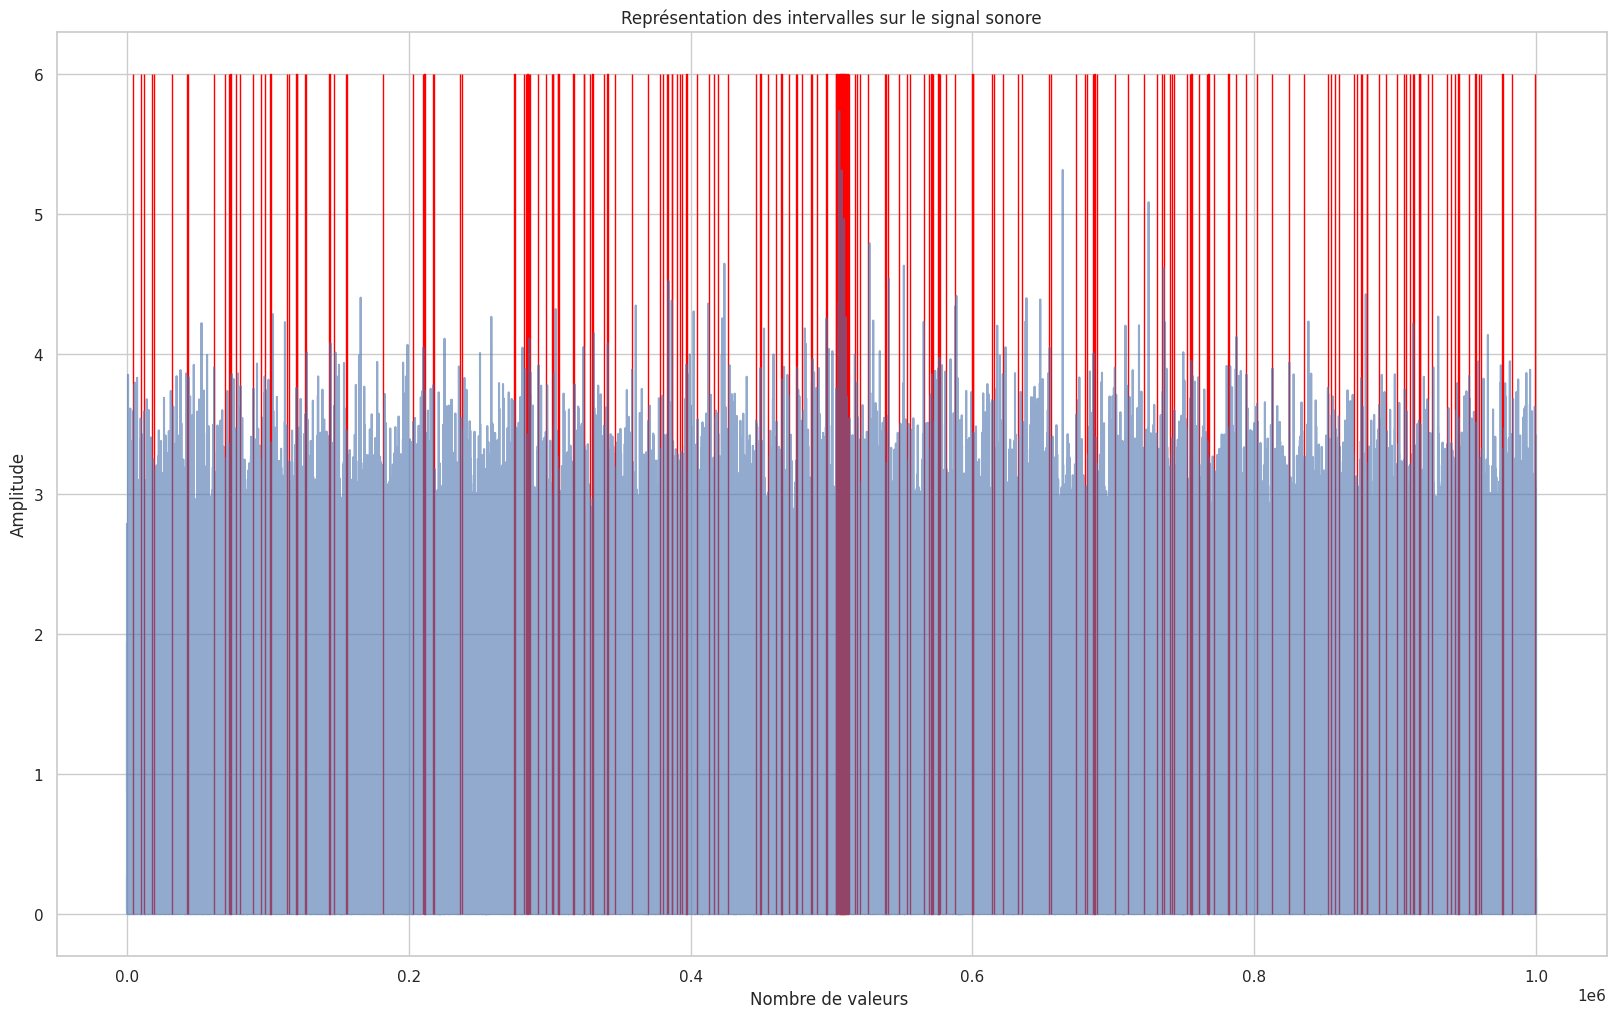

In [190]:
plt.figure(figsize=(20,12))
plt.plot(son_abs, label='Signal Son Total',alpha=0.6)

for start, end in beyond_alpha:
    plage_x = range(start, end)
    plt.fill_between(plage_x,0,6,alpha=1, color='red')
    

plt.title('Représentation des intervalles sur le signal sonore')
plt.xlabel('Nombre de valeurs ')
plt.ylabel('Amplitude')
plt.show()

### B.2.g - Estimer la proportion de faux positifs avec $\alpha = 0.05$ . Est-ce la valeur attendue, et pourquoi ?

### B.2.f - Extraire le son détecté et l'enregistrer dans un fichier .wav

Avec $n=100$, on se rend compte qu'il y a certains intervalles au milieu du son ou l'hypothèse nulle n'est pas rejetée (des faux négatifs donc). Plottez ces intervalles.

Avec un $n$ trop petit, on se retrouve avec le même problème que par la méthode du seuillage (B.3 itération 1) : on a soit trop de faux négatifs, soit trop de faux positifs. En effet comme $n=100$ représente $1/480$ème de seconde (puisque l'échantillonnage est de 48000Hz), il est tout à fait possible d'avoir des intervalles avec 100 amplitudes faibles au milieu d'un son.

Refaire le test pour des intervalles d'une seconde ($n = 48000$) avec $\alpha = 0.05$, replotter le résultat, et enregistrer l'intervalle de son détecté dans un fichier wav pour écouter le résultat de votre détection de son par test d'hypothèse. Vous pourrez utiliser la fonction `scipy.io.wavfile.write`.

### B.3 - Regarder la vidéo : https://www.youtube.com/watch?v=jy9b1HSqtSk puis répondre par vrai ou faux à chacune des questions suivantes

#### B.3.a - Pour chaque détection (ie $H_0$ rejetée) j’ai une probabilité 1 - pvalue qu’il s’agisse d’une “vraie détection”
#### B.3.b - En supposant $H_0$ vraie, j’ai une probabilité $\alpha$ de conclure le rejet de $H_0$

# Pour aller plus loin

Il existe de nombreux tests d'hypothèses bien établis pour tout un tas de situations courantes (comparaison de moyennes entre 2 échantilllons, test de correlation de deux échantillons, test de normalité d'un échantillon, ... ) qui sont décrits dans les chapitres II, III et IV du poly sur les tests d'hypothèses. Vous pouvez également regarder cet article qui les résume avec le code python correspondant :

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

ou
https://towardsdatascience.com/demystifying-statistical-analysis-1-a-handy-cheat-sheet-b6229bf992cf

Et les notebook kaggle suivants:

https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing

https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests

https://www.kaggle.com/hamelg/python-for-data-26-anova

Sur l'inférence bayésienne pour remplacer un t-test :
https://www.youtube.com/watch?v=fhw1j1Ru2i0
http://nmouatta.blogspot.com/2016/08/the-bayesian-t-test-in-python_25.html